In [1]:
# Pandas
import pandas as pd

# Classifiers
from sklearn.cluster import KMeans
from sklearn import metrics

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2

# Encoders and model evaluation
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
crimes = pd.read_csv("ChicagoCrimes4500Bal.csv")

In [3]:
#Determine Class balance
crimes['Domestic'].value_counts()

False    2250
True     2250
Name: Domestic, dtype: int64

In [5]:
crimes = crimes.dropna()

In [6]:
print(crimes['Location Description'].value_counts())
print(crimes['FBI Code'].value_counts())
print(crimes['Primary Type'].value_counts())

RESIDENCE                             1040
APARTMENT                              919
STREET                                 840
SIDEWALK                               366
OTHER                                  137
                                      ... 
VEHICLE-COMMERCIAL                       1
AIRPORT EXTERIOR - NON-SECURE AREA       1
OTHER RAILROAD PROP / TRAIN DEPOT        1
AUTO                                     1
CREDIT UNION                             1
Name: Location Description, Length: 79, dtype: int64
08B    1383
6       651
26      463
14      461
18      264
08A     254
04B     161
11      159
04A     137
3       111
7       106
5        94
20       79
2        38
15       33
10       25
24       23
17       19
01A       9
16        7
9         5
22        2
19        1
13        1
Name: FBI Code, dtype: int64
BATTERY                             1544
THEFT                                651
CRIMINAL DAMAGE                      461
ASSAULT                           

In [7]:
X = crimes.copy()
y = crimes['Domestic']
print(X.head())

             Primary Type          Description  \
0  PUBLIC PEACE VIOLATION     RECKLESS CONDUCT   
1                 BATTERY               SIMPLE   
2                 BATTERY  AGGRAVATED: HANDGUN   
3                 BATTERY               SIMPLE   
4                 BATTERY               SIMPLE   

             Location Description  Arrest  Domestic  Beat  District  Ward  \
0                          STREET   False     False  1524        15    37   
1                        SIDEWALK   False     False  1532        15    28   
2                          STREET   False     False   631         6     8   
3  CHA HALLWAY/STAIRWELL/ELEVATOR   False     False   133         1     3   
4         RESIDENCE PORCH/HALLWAY   False     False   215         2     3   

   Community Area FBI Code  
0              25       24  
1              25      08B  
2              44      04B  
3              35      08B  
4              38      08B  


In [8]:
# encode data 
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [10]:
# Feature selection
selector = SelectKBest(chi2, k=2)
newX = selector.fit_transform(X_enc, y_enc)
cols = selector.get_support(indices = True)
print(cols)
print(X.iloc[:, cols])

[0 9]
                Primary Type FBI Code
0     PUBLIC PEACE VIOLATION       24
1                    BATTERY      08B
2                    BATTERY      04B
3                    BATTERY      08B
4                    BATTERY      08B
...                      ...      ...
4495                 BATTERY      08B
4496         CRIMINAL DAMAGE       14
4497                 BATTERY      04B
4498                 ASSAULT      08A
4499                 ASSAULT      08A

[4486 rows x 2 columns]


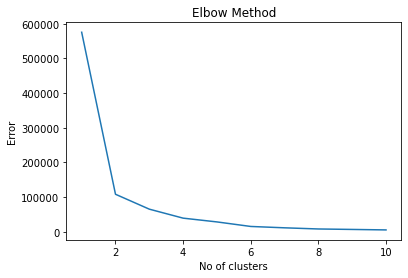

In [15]:
# Elbow method
Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i).fit(newX)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1,11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [16]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(newX)
print(y_kmeans2)

[1 0 0 ... 0 0 0]


In [17]:
kmeans2.cluster_centers_

array([[ 2.89031339,  5.55377493],
       [19.89690107, 18.03933254]])

In [19]:
print(metrics.fowlkes_mallows_score(y_enc, y_kmeans2))

0.5663690218612863


In [20]:
labels = kmeans2.labels_
print(labels)
print(metrics.silhouette_score(newX,labels, metric = 'euclidean'))

[1 0 0 ... 0 0 0]
0.7443170167815646


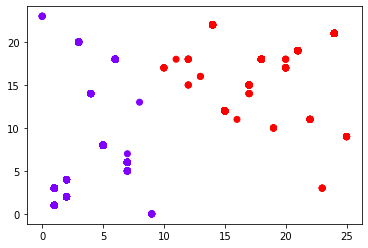

In [22]:
plt.scatter(newX[:,0], newX[:,1], c= y_kmeans2, cmap='rainbow')